In [ ]:

# This code is highly apodted from Sait Celebi's code found here: http://saitcelebi.com/tut/output/part1.html
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = np.array(iris["data"][:, 2:])# petal length, petal width 

#Isolate the target data and convert every point of 0,1,2 to a b element array representing that number
y = np.array(iris["target"])
#maintain original target for rgb purposes
colory = np.array(iris["target"])
temp_y = np.zeros((y.size, 3))
for tar in range(y.size):
  temp_y[tar][y[tar]] = 1
y = temp_y
print(y.size)

#Seperate out the testing data
X_test = [X[0], X[1], X[-1], X[-2]]
y_test = [y[0], y[1], y[-1], y[-2]]
X = X[2:148]
y = y[2:148]
colory = colory[2:148]
print(y.size)



450
438


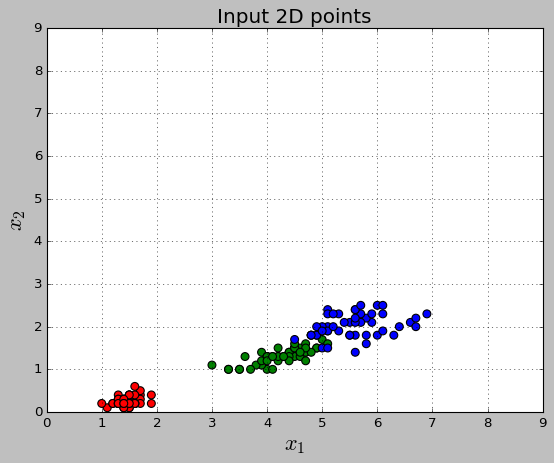

In [65]:
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)


colormap = np.array(['r', 'g', 'b'])
def colormapfun(arr):
   if arr[:][0] == 1: return 'r'
   if arr[:][1] == 1: return 'g'
   return 'b'

def plot_scatter(X, y, colormap, path):
  plt.grid()
  plt.xlim([0.0, 9.0])
  plt.ylim([0.0, 9.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[colory])
  plt.savefig(path)

#plot is saved as data.png
plot_scatter(X, y, colormap, 'data.png')
plt.show()


plt.close()
#plt.clf()
#plt.cla()

Graph saved under data.png in files (left side tool bar)

In [ ]:
#Find the softmax that will be the primary tool to evaluate our results with forward propogation.
#Soft max will give a ratio of the 3 element array such that a[0]+a[1]+a[2]=1
#Make it stable so that regular floating point computers can do the math by only focusing on the largest exponenet
def stable_softmax(z):
  # z is 3 x 1
  a = np.exp(z - max(z)) / np.sum(np.exp(z - max(z)))
  # a is 3 x 1
  return a

#Do the forward propogation which will determine which direction we are heading
def forward_propagate(x, W, b):
  # W is 3 x 2
  # x is 2 x 1
  # b is 3 x 1

  #Just like in the 2 dimensional we must multiply the ws by the xs and add b
  #Here this is all done with linear algebra matrix multiplication
  tz = np.matmul(W, x)
  z = np.add(tz, b)
  a = stable_softmax(z)
  # z is 3 x 1
  # a is 3 x 1
  return z, a


#Initial values as a starting point to imorove on using gradient desent
W = np.array([[-4, -4],[2,4],[0,9]])   # some magical w
b = np.array([[1.99], [-.3], [-4]])             # some magical b
x = np.array([2, 4])     # point we want to classify
a = np.array([1000.0, 2000.0, 3000.0])
z, a = forward_propagate(X[0,:].reshape(2,1), W, b)




[[-4.01]
 [ 3.1 ]
 [-2.2 ]]
[[0.001]
 [0.994]
 [0.005]]
[1. 0. 0.]


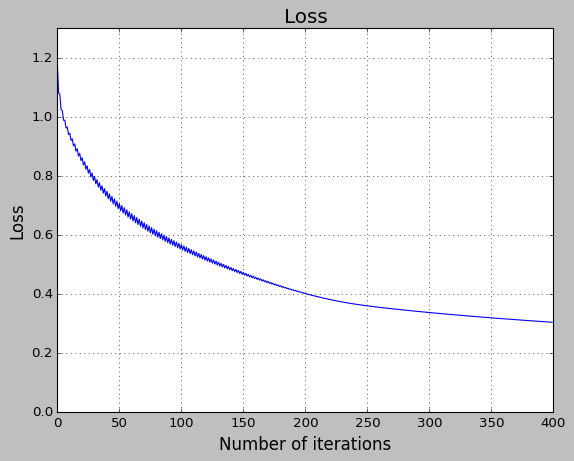

In [66]:
#Learning rate was set through experiment
LEARNING_RATE = 0.25
NUM_EPOCHS = 400

#Let the learning begin

#Conceptualy the loss is the negative value of a multiplied by the known result 
#because log is a strictly increasing function we can minimize the negative log of that result
def get_loss(y, a):
  return -1 * np.sum(y * np.log(a))

#again, because it is nearly impossible for computers to find the log of very small numbers we
#must maintain the mathematical truth while apodting the formula to not have to deal with that 
def get_loss_numerically_stable(y, z):
   return -1 * np.sum(y * (z + (-z.max() - np.log(np.sum(np.exp(z-z.max()))))))

#Find the derivative to find which way to travel and by how much on the gradient
def get_gradients(x, z, a, y):
  da = (-y / a)
  #Get the Hadamard product to find the derivative with respect to each, because we need to find
  #dz dW and db. In order not to iterate we use the identity matrix
  matrix = np.matmul(a, np.ones((1, 3))) * (np.identity(3) - np.matmul(np.ones((3, 1)), a.T))
  dz = np.matmul(matrix, da)

  dW = dz * x.T
  db = dz.copy()

  return dz, dW, db

#Actually adjust W and b values based on the derivatives and the learning rate
def gradient_descent(W, b, dW, db, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return W, b

# random initialization
W_initial = np.random.rand(3, 2)
W = W_initial.copy()
b = np.zeros((3, 1))

W_cache = []
b_cache = []
L_cache = []

#Actually get learning. Go through the data a number of times constantly adjusting w and b to minimize loss
for i in range(NUM_EPOCHS):
  dW = np.zeros(W.shape)
  db = np.zeros(b.shape)
  L = 0
  #find the loss and gradient for every peice of data adding it all up to the total derivative
  for j in range(X.shape[0]):
    x_j = X[j,:].reshape(2,1)
    y_j = y[j,:].reshape(3,1)

    z_j, a_j = forward_propagate(x_j, W, b)
    loss_j = get_loss_numerically_stable(y_j, z_j)
    dZ_j, dW_j, db_j = get_gradients(x_j, z_j, a_j, y_j)

    dW += dW_j
    db += db_j
    L += loss_j
  #Finally calculate the total partial derivatives and loss to determine which way to move 
  dW *= (1.0/(y.size/3))
  db *= (1.0/(y.size/3))
  L *= (1.0/(y.size/3))

  #Actually adjust weights
  W, b = gradient_descent(W, b, dW, db, LEARNING_RATE)

  W_cache.append(W)
  b_cache.append(b)
  L_cache.append(L)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.ylim([0, max(L_cache) * 1.1])
plt.plot(L_cache)

plt.savefig('loss.png')

plt.show()


plt.close()

Graph saved under loss.png in files (left side tool bar)

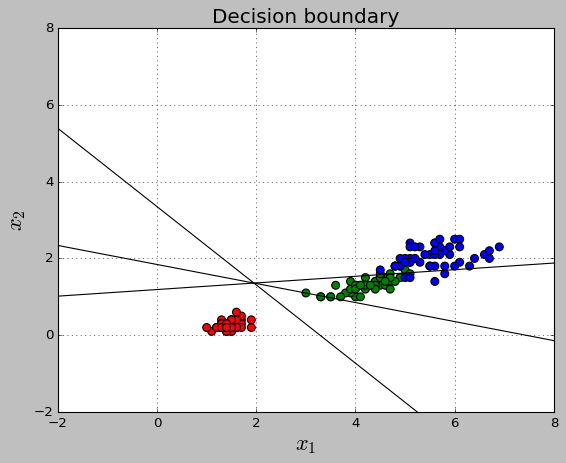

In [67]:
def plot_decision_boundary(X, Y, W, b, path):
  plt.grid()
  plt.xlim([-2, 8])
  plt.ylim([-2, 8])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary', size = 18)

  plt.scatter(X[:, 0], X[:, 1], s=50, c=colormap[colory])

  xs = np.array([-2, 8])
  ys1 = ((b[1, 0] - b[0, 0]) - (W[0, 0] - W[1, 0]) * xs) / (W[0, 1] - W[1, 1])
  ys2 = ((b[2, 0] - b[0, 0]) - (W[0, 0] - W[2, 0]) * xs) / (W[0, 1] - W[2, 1])
  ys3 = ((b[2, 0] - b[1, 0]) - (W[1, 0] - W[2, 0]) * xs) / (W[1, 1] - W[2, 1])

  plt.plot(xs, ys1, c='black')
  plt.plot(xs, ys2, c='black')
  plt.plot(xs, ys3, c='black')

  plt.savefig(path)

plot_decision_boundary(X, y, W, b, 'Decision.png')

plt.show()


plt.close()

Graph saved under decision.png in files (left side tool bar)

In [ ]:
#Test using the testing data
print(len(X_test))
for i in range(len(X_test)):
  res = forward_propagate(X_test[i].reshape(2,1), W, b)
  print("Is: "+str(res[1])+ "is expecting "+str(y_test[i]))



4
Is: [[0.917]
 [0.081]
 [0.002]]is expecting [1. 0. 0.]
Is: [[0.917]
 [0.081]
 [0.002]]is expecting [1. 0. 0.]
Is: [[0.002]
 [0.364]
 [0.634]]is expecting [0. 0. 1.]
Is: [[0.  ]
 [0.11]
 [0.89]]is expecting [0. 0. 1.]
w: [[-0.444 -1.318]
 [ 1.044 -0.038]
 [ 0.774  3.198]]
b: [[ 4.472]
 [-0.29 ]
 [-4.182]]
